Pearson's correlation coefficient is the linear relations between 2 variables and does not take into account the model fitting the data

#### Import stuff

In [3]:
library(SDSFoundations, lib.loc='C:/Program Files/R/R-3.6.1/library/')
wbd <- WorldBankData

In [4]:
str(wbd)

'data.frame':	13303 obs. of  14 variables:
 $ Country         : Factor w/ 251 levels "Afghanistan",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ Country.Code    : Factor w/ 251 levels "ABW","AFG","AGO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year            : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ Region          : Factor w/ 8 levels "","East Asia & Pacific",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ IncomeGroup     : Factor w/ 5 levels "","High income",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ population      : num  54208 55435 56226 56697 57029 ...
 $ rural.population: num  26683 27296 27694 27934 28107 ...
 $ hiv.cases       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ san.access      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ motor.vehicles  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ gas.price       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ co2.emission    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ mobile.users    : num  0 NA NA NA NA 0 NA NA NA NA ...
 $ internet.users  : num  NA NA NA NA N

### Primary Research Question
Denmark is a high-income country in Europe of about 5.5 million people. *What is the best-fitting model for growth of internet usage in Denmark since 1990?*

In [6]:
dmk = wbd[wbd$Country == 'Denmark' & wbd$year >= 1990,]

In [7]:
dmk

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users
3264,Denmark,DNK,1990,Europe & Central Asia,High income,5140939,779212,NA,5140939,NA,NA,49746.52,148238,5001
3265,Denmark,DNK,1991,Europe & Central Asia,High income,5154298,779835,NA,NA,NA,NA,61213.23,175943,10002
3266,Denmark,DNK,1992,Europe & Central Asia,High income,5171370,781011,NA,NA,NA,NA,54319.27,211066,20009
3267,Denmark,DNK,1993,Europe & Central Asia,High income,5188628,782206,NA,NA,NA,NA,57157.53,357451,30007
3268,Denmark,DNK,1994,Europe & Central Asia,High income,5206180,783436,NA,NA,NA,NA,61051.88,503003,69987
3269,Denmark,DNK,1995,Europe & Central Asia,High income,5233373,786105,NA,5233373,NA,1.08,55140.68,822388,200211
3270,Denmark,DNK,1996,Europe & Central Asia,High income,5263074,789293,NA,NA,NA,NA,68602.24,1318770,300784
3271,Denmark,DNK,1997,Europe & Central Asia,High income,5284991,791301,NA,NA,NA,NA,57054.85,1446290,601538
3272,Denmark,DNK,1998,Europe & Central Asia,High income,5304219,792896,NA,NA,NA,1.05,56068.43,1933120,1202400
3273,Denmark,DNK,1999,Europe & Central Asia,High income,5321799,794236,NA,NA,NA,NA,50930.96,2629766,1628047


In [8]:
dmk$time = dmk$year - 1990

In [9]:
dmk$mil = dmk$internet.users / 1000000

In [10]:
dmk

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users,time,mil
3264,Denmark,DNK,1990,Europe & Central Asia,High income,5140939,779212,NA,5140939,NA,NA,49746.52,148238,5001,0,0.005001
3265,Denmark,DNK,1991,Europe & Central Asia,High income,5154298,779835,NA,NA,NA,NA,61213.23,175943,10002,1,0.010002
3266,Denmark,DNK,1992,Europe & Central Asia,High income,5171370,781011,NA,NA,NA,NA,54319.27,211066,20009,2,0.020009
3267,Denmark,DNK,1993,Europe & Central Asia,High income,5188628,782206,NA,NA,NA,NA,57157.53,357451,30007,3,0.030007
3268,Denmark,DNK,1994,Europe & Central Asia,High income,5206180,783436,NA,NA,NA,NA,61051.88,503003,69987,4,0.069987
3269,Denmark,DNK,1995,Europe & Central Asia,High income,5233373,786105,NA,5233373,NA,1.08,55140.68,822388,200211,5,0.200211
3270,Denmark,DNK,1996,Europe & Central Asia,High income,5263074,789293,NA,NA,NA,NA,68602.24,1318770,300784,6,0.300784
3271,Denmark,DNK,1997,Europe & Central Asia,High income,5284991,791301,NA,NA,NA,NA,57054.85,1446290,601538,7,0.601538
3272,Denmark,DNK,1998,Europe & Central Asia,High income,5304219,792896,NA,NA,NA,1.05,56068.43,1933120,1202400,8,1.202400
3273,Denmark,DNK,1999,Europe & Central Asia,High income,5321799,794236,NA,NA,NA,NA,50930.96,2629766,1628047,9,1.628047


In [22]:
names(dmk)[16] <- 'pro'

In [23]:
dmk$pro <- dmk$internet.users / dmk$population

In [24]:
dmk

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users,time,pro
3264,Denmark,DNK,1990,Europe & Central Asia,High income,5140939,779212,NA,5140939,NA,NA,49746.52,148238,5001,0,0.0009727795
3265,Denmark,DNK,1991,Europe & Central Asia,High income,5154298,779835,NA,NA,NA,NA,61213.23,175943,10002,1,0.0019405164
3266,Denmark,DNK,1992,Europe & Central Asia,High income,5171370,781011,NA,NA,NA,NA,54319.27,211066,20009,2,0.0038691875
3267,Denmark,DNK,1993,Europe & Central Asia,High income,5188628,782206,NA,NA,NA,NA,57157.53,357451,30007,3,0.0057832244
3268,Denmark,DNK,1994,Europe & Central Asia,High income,5206180,783436,NA,NA,NA,NA,61051.88,503003,69987,4,0.0134430619
3269,Denmark,DNK,1995,Europe & Central Asia,High income,5233373,786105,NA,5233373,NA,1.08,55140.68,822388,200211,5,0.0382565890
3270,Denmark,DNK,1996,Europe & Central Asia,High income,5263074,789293,NA,NA,NA,NA,68602.24,1318770,300784,6,0.0571498710
3271,Denmark,DNK,1997,Europe & Central Asia,High income,5284991,791301,NA,NA,NA,NA,57054.85,1446290,601538,7,0.1138200614
3272,Denmark,DNK,1998,Europe & Central Asia,High income,5304219,792896,NA,NA,NA,1.05,56068.43,1933120,1202400,8,0.2266874727
3273,Denmark,DNK,1999,Europe & Central Asia,High income,5321799,794236,NA,NA,NA,NA,50930.96,2629766,1628047,9,0.3059204228


Exponential Fit 
 a =  0.00585 
 b =  1.34666 
 R-squared =  0.80012

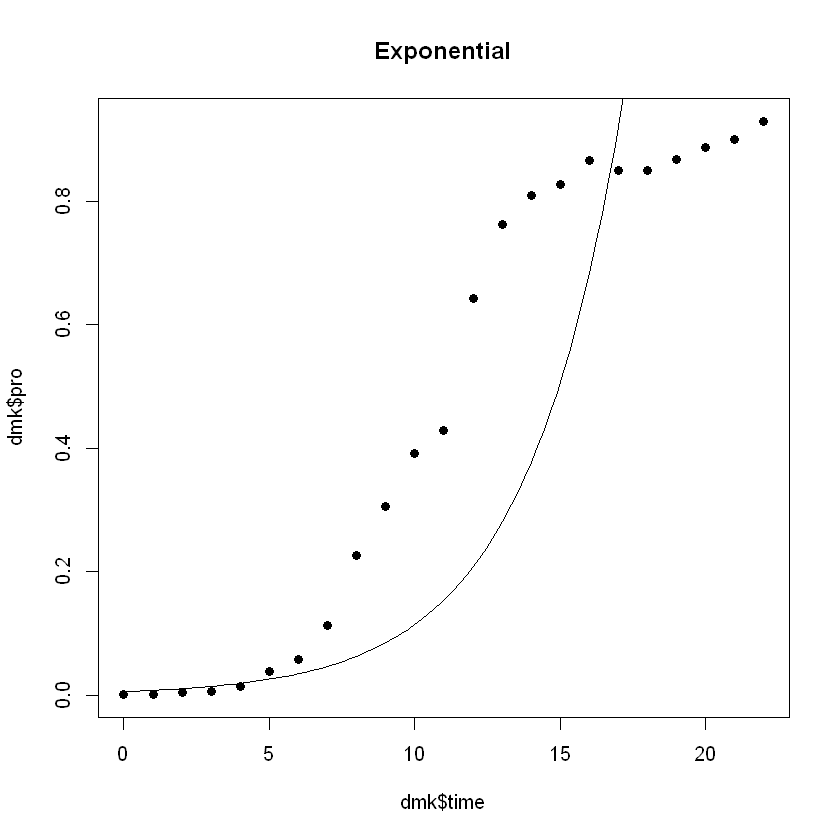

In [25]:
expFit(dmk$time,dmk$pro)

Logistic Fit 
 C =  0.89668 
 a =  308.8322 
 b =  1.73123 
 R-squared =  0.99487

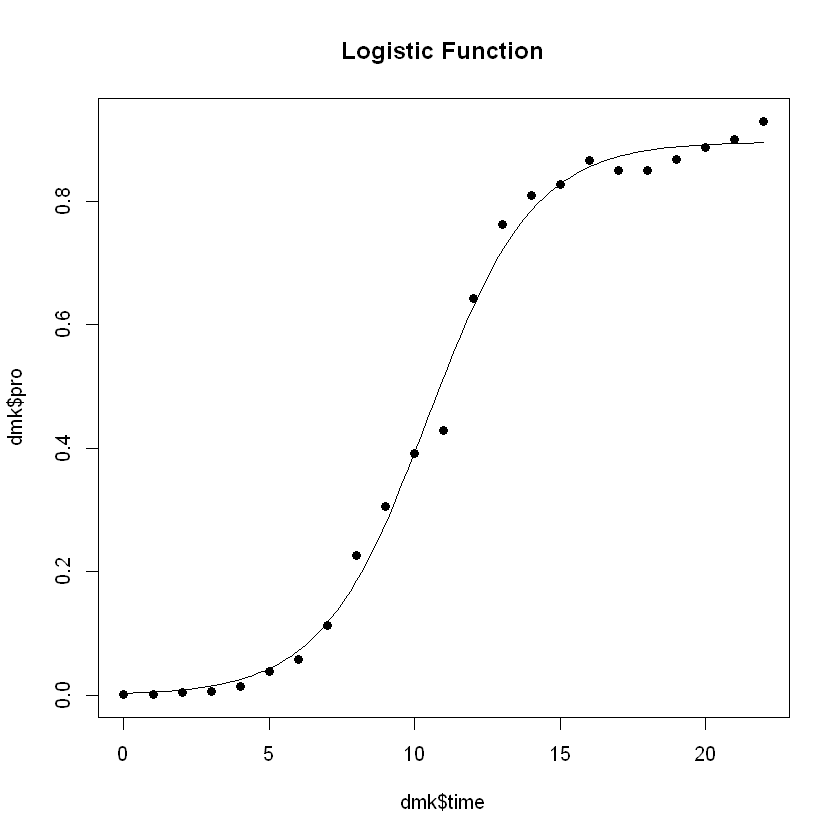

In [26]:
logisticFit(dmk$time,dmk$pro)

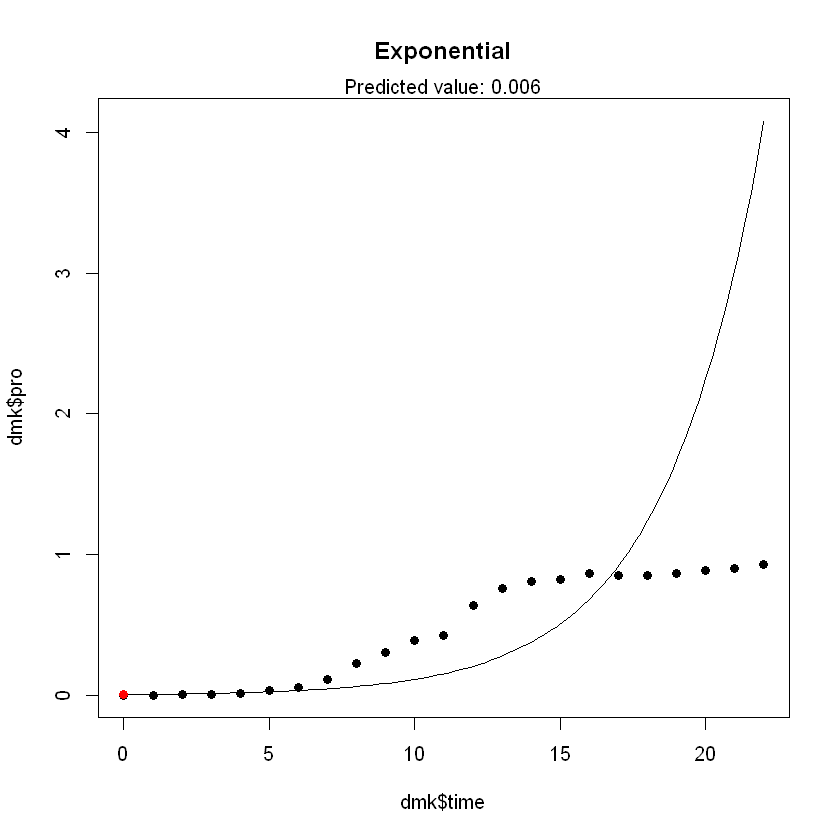

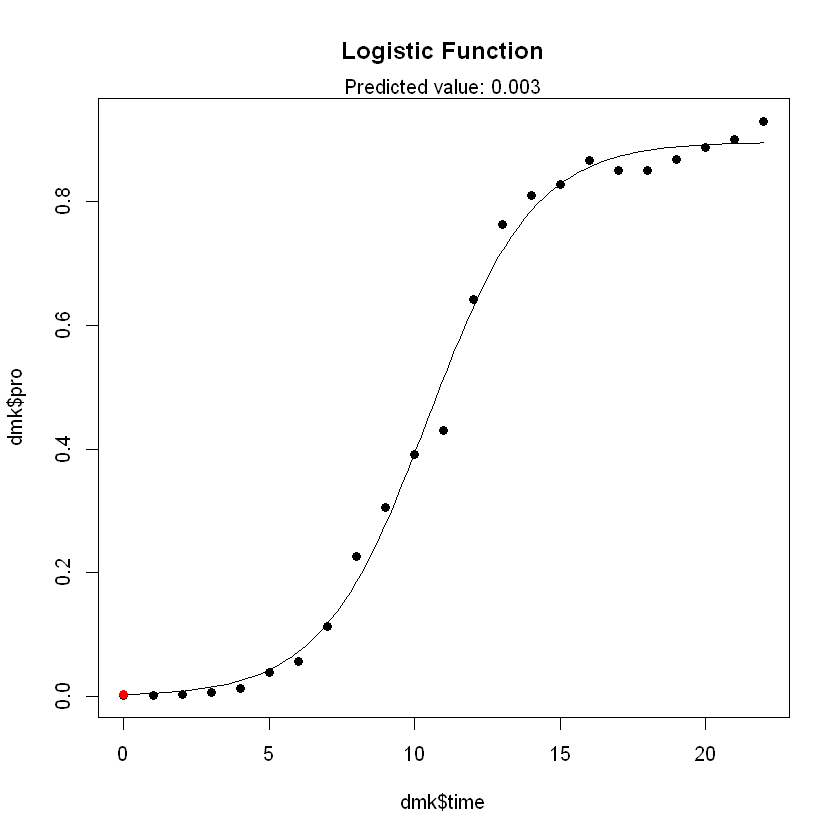

In [27]:
e = expFitPred(dmk$time,dmk$pro,0)
l = logisticFitPred(dmk$time,dmk$pro,0)